
### **Importing madules**:

In [94]:
import os
import gc
import sys

from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras import Sequential
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Dense, Reshape
from keras.engine import sequential

import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random as rnd

from sklearn.model_selection import train_test_split


import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import preprocess_input
import cv2
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Reading the dataset**:
I uploaded thedataset in my google drive and mounted my drive so that I could use it here.

In [95]:
main_path = 'drive/MyDrive/Grapevine_Leaves_Image_Dataset/'
path_Ak = main_path + 'Ak'
path_Ala_Idris = main_path + 'Ala_Idris'
path_Buzgulu = main_path + 'Buzgulu'
path_Dimnit = main_path + 'Dimnit'
path_Nazli = main_path + 'Nazli'

In [96]:
main_df = pd.DataFrame()

In [97]:
main_df['images'] = os.listdir(path_Ak) + os.listdir(path_Ala_Idris) + os.listdir(path_Buzgulu) + os.listdir(path_Dimnit) + os.listdir(path_Nazli)

Finding different classes using file names:

In [98]:
classes = []
path = []
for image in main_df['images']:
    class_ = image.split(' (')[0]
    classes.append(class_)
    path.append(main_path+class_+'/'+image)

In [99]:
main_df['classes'] = classes
main_df['path'] = path

In [100]:
main_df.head()

,images,classes,path
0,Ak (33).png,Ak,drive/MyDrive/Grapevine_Leaves_Image_Dataset/A...
1,Ak (1).png,Ak,drive/MyDrive/Grapevine_Leaves_Image_Dataset/A...
2,Ak (34).png,Ak,drive/MyDrive/Grapevine_Leaves_Image_Dataset/A...
3,Ak (14).png,Ak,drive/MyDrive/Grapevine_Leaves_Image_Dataset/A...
4,Ak (50).png,Ak,drive/MyDrive/Grapevine_Leaves_Image_Dataset/A...


Checking missing data:

In [101]:
main_df.isna().sum()

images     0
classes    0
path       0
dtype: int64

Counting the data of each class:

In [102]:
print('Leaves Count: ',len(main_df['classes'].value_counts()))
main_df['classes'].value_counts()

Leaves Count:  5


Ak           100
Ala_Idris    100
Buzgulu      100
Dimnit       100
Nazli        100
Name: classes, dtype: int64

### **Plotting the dataset**:

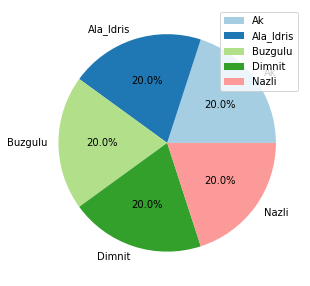

In [ ]:
plt.figure(figsize=(5,5))
class_cnt = main_df.groupby(['classes']).size().reset_index(name = 'counts')
colors = sns.color_palette('Paired')[0:9]
plt.pie(class_cnt['counts'], labels=class_cnt['classes'], colors=colors, autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

{'classes': ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli'], 'count': [100, 100, 100, 100, 100]}


Text(0.5, 0, 'classes')

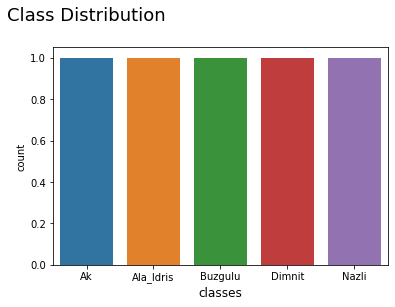

In [ ]:
labels = ['Ak', 'Ala_Idris', 'Buzgulu', 'Dimnit', 'Nazli']
bar = {}
bar['classes'] = labels
bar['count'] = [len(os.listdir(main_path+i)) for i in labels]
print(bar)
bar_df = pd.DataFrame(bar, index=[1,2,3,4,5])

ax = sns.countplot(x=labels, data=bar_df)
ax.set_title('Class Distribution\n', x = 0.1, y=1, fontsize = 18);
ax.set_xlabel("classes", fontsize = 12)

### **Visualization**:

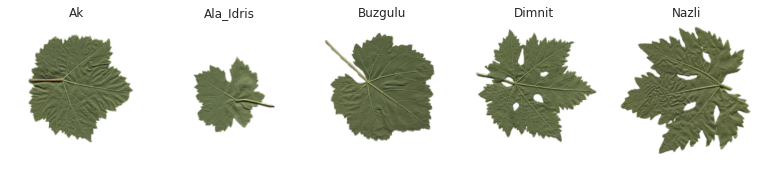

In [ ]:
plt.figure(figsize = (15,12))
for idx,i in enumerate(main_df.classes.unique()):
    plt.subplot(4,7,idx+1)
    df = main_df[main_df['classes'] ==i].reset_index(drop = True)
    image_path = df.loc[rnd.randint(0, len(df))-1,'path']
    img = Image.open(image_path)
    img = img.resize((224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
plt.tight_layout()
plt.show()

### **Splitting the data**:





Here I split the data into two parts:


*   Labels
*   Features



In [103]:
label = main_df['classes']

In [104]:
new_df =  main_df[['images','path']].copy()

Then I split the dataset into train set and test set.

In [105]:
X_train, X_test, y_train, y_test = train_test_split(new_df, label, test_size=0.2, random_state=42)

After seperating the test set, we have to split the train set into train and validation.

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Finding the shape of each set:

In [107]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (320, 2)
X_test shape: (100, 2)
X_val shape: (80, 2)
y_train shape: (320,)
y_test shape: (100,)
y val shape: (80,)


In [108]:
train_ds = pd.concat([X_train, y_train], axis=1, join='inner')
val_ds = pd.concat([X_val, y_val], axis=1, join='inner')
test_ds = pd.concat([X_test, y_test], axis=1, join='inner')


In [109]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest"
        )

val_datagen = ImageDataGenerator(rescale=1 / 255.0)

### **Data augmentation**:
The performance of most deep learning models depends on the quality, quantity and relevancy of training data.\
Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. It is a good practice to use DA if you want to prevent overfitting, or the initial dataset is too small to train on, or even if you want to squeeze better performance from your model.

Generating new data:

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=10,
    zoom_range=0.20,
    brightness_range=[0.7,1.2],
    fill_mode='nearest',
    channel_shift_range=0.5,
    shear_range=0.15,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
) 

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
) 

train_generator= datagen.flow_from_dataframe(
        train_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)

val_generator = datagen.flow_from_dataframe(
        val_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)
test_generator = test_datagen.flow_from_dataframe(
        test_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)

Found 320 validated image filenames belonging to 5 classes.
Found 80 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


**plotting ugmented data:**

In [ ]:
def show_image_samples(gen ):
    t_dict=gen.class_indices
    classes=list(t_dict.keys())    
    images,labels=next(gen)
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]/227
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

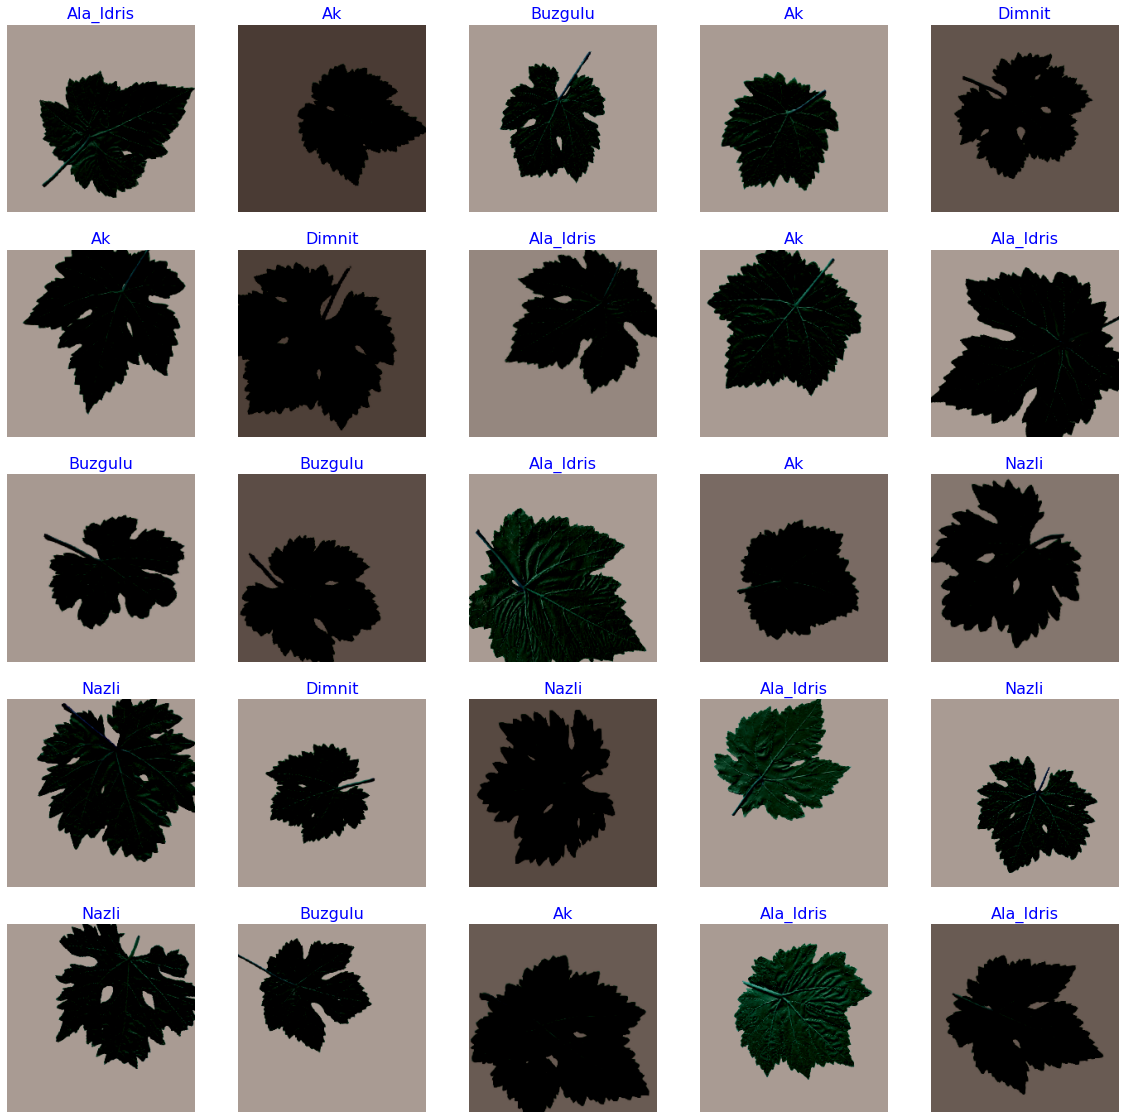

In [ ]:
show_image_samples(train_generator)

I use a callback, which helps me save the best accuracy I get.

In [ ]:
cb = tf.keras.callbacks.ModelCheckpoint("save_model_xception.h5", save_best_only=True)
callbacks = [cb]

### **Code for confusion matrix:**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def confusion(model, y_act, y_predicted):
    y_predicted = np.argmax(y_predicted, axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    y_predicted = np.array([labels[k] for k in y_predicted])
    print(f"Accuracy score: {accuracy_score(y_act, y_predicted)}")
    print(classification_report(y_act, y_predicted))
    mat = confusion_matrix(y_act, y_predicted)
    sns.heatmap(mat, annot=True)

### **Training models and fitting them on the data**:
I use pre-trained models in my project. A pre-trained model is a model created by some one else to solve a similar problem. Instead of building a model from scratch to solve this problem, I used the model trained on other problem as a starting point.

##### **VGG19**:

The first pre-trained model I use is **VGG 19**. VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. 

In [ ]:
vgg19 = VGG19(include_top = False, input_shape = (227,227,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in vgg19.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(vgg19.output)
predictions = Dense(5, activation='softmax')(x)

model_vgg = Model(inputs = vgg19.input, outputs = predictions)

80150528/80134624 [==============================] - 0s 0us/step


Compiling the model:

In [ ]:
model_vgg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Fitting it on the train set:

In [ ]:
history_vgg = model_vgg.fit(
      train_generator,
      validation_data=val_generator,
      epochs=40,
      verbose=2,
      callbacks = callbacks)

Epoch 1/40
10/10 - 131s - loss: 2.7947 - accuracy: 0.2375 - val_loss: 1.9607 - val_accuracy: 0.3250 - 131s/epoch - 13s/step
Epoch 2/40
10/10 - 12s - loss: 2.1084 - accuracy: 0.2500 - val_loss: 1.7838 - val_accuracy: 0.3375 - 12s/epoch - 1s/step
Epoch 3/40
10/10 - 10s - loss: 1.8300 - accuracy: 0.2750 - val_loss: 1.7130 - val_accuracy: 0.3375 - 10s/epoch - 1s/step
Epoch 4/40
10/10 - 10s - loss: 1.6225 - accuracy: 0.3438 - val_loss: 1.5094 - val_accuracy: 0.3750 - 10s/epoch - 1s/step
Epoch 5/40
10/10 - 10s - loss: 1.4725 - accuracy: 0.3750 - val_loss: 1.4833 - val_accuracy: 0.3625 - 10s/epoch - 1s/step
Epoch 6/40
10/10 - 10s - loss: 1.3966 - accuracy: 0.4563 - val_loss: 1.3841 - val_accuracy: 0.4500 - 10s/epoch - 1s/step
Epoch 7/40
10/10 - 10s - loss: 1.2701 - accuracy: 0.5000 - val_loss: 1.1971 - val_accuracy: 0.4250 - 10s/epoch - 1s/step
Epoch 8/40
10/10 - 10s - loss: 1.1944 - accuracy: 0.5344 - val_loss: 1.2515 - val_accuracy: 0.4875 - 10s/epoch - 1000ms/step
Epoch 9/40
10/10 - 11s - 

Predicting the test set using the model we trained:

In [ ]:
pred = model_vgg.evaluate(test_generator)

4/4 [==============================] - 23s 7s/step - loss: 0.5508 - accuracy: 0.7800


| epoch | val accuracy | test accuracy |
| --- | --- | --- |
| 10 | 52.5 | 56.0 |
| 30 | 77.7 | 79.0 |
| 50 | 82.5 | 79.0 |
| 40 | 72.5 | 78.0 |



As you can see, after spending 20 more epochs the accuracy if the test set did not change. So increasing the umber of epochs wouldn't help anymore.

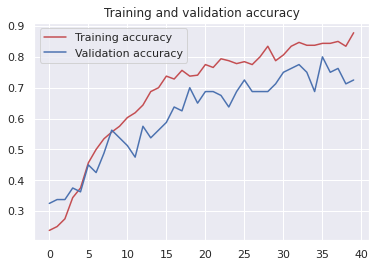

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

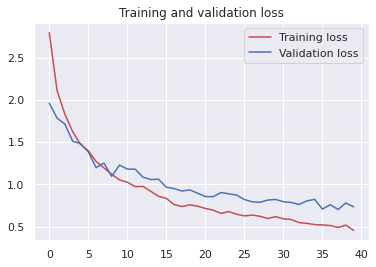

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

**Confusion matrix:**

Accuracy score: 0.78
              precision    recall  f1-score   support

          Ak       1.00      0.57      0.73        28
   Ala_Idris       0.73      0.79      0.76        14
     Buzgulu       0.43      0.90      0.58        10
      Dimnit       0.79      0.92      0.85        24
       Nazli       1.00      0.83      0.91        24

    accuracy                           0.78       100
   macro avg       0.79      0.80      0.76       100
weighted avg       0.85      0.78      0.79       100



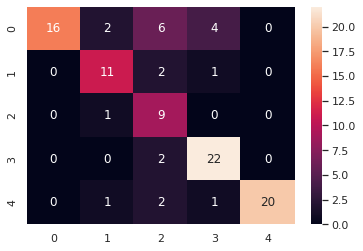

In [ ]:
y_predict = model_vgg.predict(test_generator)
confusion(model_vgg, np.array(test_ds['classes']), y_predict)

**10 fold cross validation:**\
It took me so much to train the model once, so training it 10 times was impossible so that I changed epoch number to 20.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits = 10)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(main_df[['path', 'classes']], main_df[['classes']], test_size=0.2, random_state=42)


Y = y_train

test_generator_vgg = test_datagen.flow_from_dataframe(
        test_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
)


for train_index, val_index in kf.split(np.zeros(400),Y):
  training_data = X_train.iloc[train_index]
  validation_data = X_train.iloc[val_index]

  train_generator_vgg= datagen.flow_from_dataframe(
          training_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  val_generator_vgg = datagen.flow_from_dataframe(
          validation_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  history_vgg = model_vgg.fit(
      train_generator_vgg,
      validation_data=val_generator,
      epochs=20,
      verbose=2,
      callbacks = callbacks)
  pred = model_vgg.evaluate(val_generator_vgg)
  pred_test =  model_vgg.evaluate(test_generator_vgg)
  print("validation result:", pred)
  print("test result:", pred_test)



Found 100 validated image filenames belonging to 5 classes.
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/20
12/12 - 11s - loss: 0.5202 - accuracy: 0.8556 - val_loss: 0.6475 - val_accuracy: 0.7625 - 11s/epoch - 879ms/step
Epoch 2/20
12/12 - 9s - loss: 0.5282 - accuracy: 0.8306 - val_loss: 0.7152 - val_accuracy: 0.8500 - 9s/epoch - 774ms/step
Epoch 3/20
12/12 - 9s - loss: 0.4820 - accuracy: 0.8556 - val_loss: 0.7412 - val_accuracy: 0.7250 - 9s/epoch - 776ms/step
Epoch 4/20
12/12 - 9s - loss: 0.4931 - accuracy: 0.8667 - val_loss: 0.5852 - val_accuracy: 0.7375 - 9s/epoch - 790ms/step
Epoch 5/20
12/12 - 13s - loss: 0.4865 - accuracy: 0.8556 - val_loss: 0.5519 - val_accuracy: 0.8375 - 13s/epoch - 1s/step
Epoch 6/20
12/12 - 12s - loss: 0.4438 - accuracy: 0.8583 - val_loss: 0.6224 - val_accuracy: 0.7875 - 12s/epoch - 962ms/step
Epoch 7/20
12/12 - 13s - loss: 0.4645 - accuracy: 0.8583 - val_loss: 0.6254 - val_accu

| Fold  Number | val accuracy | test accuracy |
| --- | --- | --- |
| 1 | 85 | 75 |
| 2 | 89 | 75 |
| 3 | 92 | 75.9 |
| 4 | 97 | 82 |
| 5 | 85 | 76.9 |
| 6 | 92.5 | 76.9 |
| 7 | 97.5 | 77.9 |
| 8 | 89.9 | 75.9 |
| 9 | 92.5 | 79.0 |
| 10 | 92.5 | 77.9 |



##### **ResNet50**:
ResNet50 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.

In [ ]:
resnet50 = ResNet50(include_top = False, input_shape = (227,227,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(resnet50.output)
predictions = Dense(5, activation='softmax')(x)

model_resnet50 = Model(inputs = resnet50.input, outputs = predictions)

94781440/94765736 [==============================] - 0s 0us/step


Compiling the model:

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_resnet50.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Fitting the model:

In [ ]:
history_resnet50 = model_resnet50.fit(
      train_generator,
      validation_data=val_generator,
      epochs=50,
      verbose=2,
      callbacks = callbacks)

Epoch 1/50
10/10 - 13s - loss: 2.5853 - accuracy: 0.3500 - val_loss: 2.1195 - val_accuracy: 0.2750 - 13s/epoch - 1s/step
Epoch 2/50
10/10 - 8s - loss: 1.5494 - accuracy: 0.4938 - val_loss: 1.0938 - val_accuracy: 0.5750 - 8s/epoch - 803ms/step
Epoch 3/50
10/10 - 8s - loss: 1.0618 - accuracy: 0.5875 - val_loss: 0.8857 - val_accuracy: 0.7125 - 8s/epoch - 807ms/step
Epoch 4/50
10/10 - 9s - loss: 0.8098 - accuracy: 0.7094 - val_loss: 0.9021 - val_accuracy: 0.6750 - 9s/epoch - 912ms/step
Epoch 5/50
10/10 - 8s - loss: 0.6765 - accuracy: 0.7563 - val_loss: 0.6660 - val_accuracy: 0.8125 - 8s/epoch - 807ms/step
Epoch 6/50
10/10 - 8s - loss: 0.5646 - accuracy: 0.7750 - val_loss: 0.6811 - val_accuracy: 0.7750 - 8s/epoch - 807ms/step
Epoch 7/50
10/10 - 8s - loss: 0.4349 - accuracy: 0.8438 - val_loss: 0.5330 - val_accuracy: 0.8125 - 8s/epoch - 808ms/step
Epoch 8/50
10/10 - 8s - loss: 0.4086 - accuracy: 0.8656 - val_loss: 0.5413 - val_accuracy: 0.8250 - 8s/epoch - 809ms/step
Epoch 9/50
10/10 - 8s - l

Predicting test data:

In [ ]:
pred = model_resnet50.evaluate(test_generator)

4/4 [==============================] - 1s 300ms/step - loss: 1.0294 - accuracy: 0.6800


| epoch |learning rate | val accuracy | test accuracy |
| --- | --- | --- | ---|
| 10 | 0.001 | 83.7 | 81.0 |
| 10 | 0.01 | 73.75 | 82.0 |
| 10 | 0.1 | 77.75 | 64.0 |
| 50 | 0.001 | 76.2 | 81.0 |
| 50 | 0.01 | 73.7 | 68.0 |

I changed the learning rate and epoch number. This pre-trained model couldn't get any accuracy more than 82. It was taking so much time to train and it had small improvements.

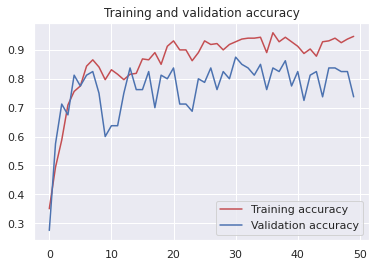

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history_resnet50.history['accuracy']
val_acc = history_resnet50.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

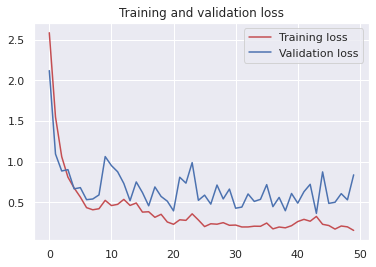

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history_resnet50.history['loss']
val_loss = history_resnet50.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

**confusion matrix:**

Accuracy score: 0.68
              precision    recall  f1-score   support

          Ak       1.00      0.39      0.56        28
   Ala_Idris       0.42      1.00      0.60        14
     Buzgulu       0.47      0.80      0.59        10
      Dimnit       0.88      0.62      0.73        24
       Nazli       0.91      0.83      0.87        24

    accuracy                           0.68       100
   macro avg       0.74      0.73      0.67       100
weighted avg       0.82      0.68      0.68       100



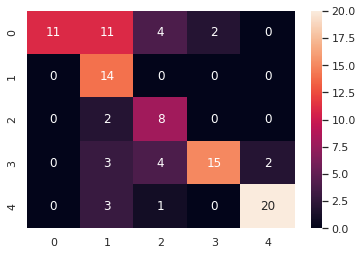

In [ ]:
y_predict = model_resnet50.predict(test_generator)
confusion(model_resnet50, np.array(test_ds['classes']), y_predict)

**10 fold cross validation:**\
It took me so much to train the model once, so training it 10 times was impossible so that I changed epoch number to 25.

In [ ]:
kf = KFold(n_splits = 10)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(main_df[['path', 'classes']], main_df[['classes']], test_size=0.2, random_state=42)


Y = y_train

test_generator_resnet = test_datagen.flow_from_dataframe(
        test_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)


for train_index, val_index in kf.split(np.zeros(400),Y):
  training_data = X_train.iloc[train_index]
  validation_data = X_train.iloc[val_index]

  train_generator_resnet= datagen.flow_from_dataframe(
          training_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  val_generator_resnet = datagen.flow_from_dataframe(
          validation_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  history_resnet50 = model_resnet50.fit(
        train_generator,
        validation_data=val_generator,
        epochs=25,
        verbose=2,
        callbacks = callbacks)
  
  pred = model_resnet50.evaluate(val_generator_resnet)
  pred_test =  model_resnet50.evaluate(test_generator_resnet)
  print("validation result:", pred[1])
  print("test result:", pred_test[1])



Found 100 validated image filenames belonging to 5 classes.
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/25
10/10 - 9s - loss: 0.1617 - accuracy: 0.9406 - val_loss: 0.4184 - val_accuracy: 0.8750 - 9s/epoch - 870ms/step
Epoch 2/25
10/10 - 8s - loss: 0.1292 - accuracy: 0.9531 - val_loss: 0.3648 - val_accuracy: 0.8375 - 8s/epoch - 811ms/step
Epoch 3/25
10/10 - 8s - loss: 0.2511 - accuracy: 0.9031 - val_loss: 0.4432 - val_accuracy: 0.8750 - 8s/epoch - 816ms/step
Epoch 4/25
10/10 - 8s - loss: 0.2313 - accuracy: 0.9250 - val_loss: 0.4897 - val_accuracy: 0.8500 - 8s/epoch - 807ms/step
Epoch 5/25
10/10 - 8s - loss: 0.1737 - accuracy: 0.9344 - val_loss: 0.4142 - val_accuracy: 0.8625 - 8s/epoch - 823ms/step
Epoch 6/25
10/10 - 9s - loss: 0.1329 - accuracy: 0.9563 - val_loss: 0.5186 - val_accuracy: 0.7625 - 9s/epoch - 901ms/step
Epoch 7/25
10/10 - 8s - loss: 0.1627 - accuracy: 0.9344 - val_loss: 0.5525 - val_accuracy

|  Fold Number | val accuracy | test accuracy |
| --- | --- | --- |
| 1 | 85 | 85 |
| 2 | 77 | 72 |
| 3 | 92.5 | 82.9 |
| 4 | 97.5 | 87.9 |
| 5 | 87.5 | 77.9 |
| 6 | 82.4 | 74.0 |
| 7 | 94.9 | 73.0 |
| 8 | 94.9 | 77.9 |
| 9 | 97.5 | 85.0 |
| 10 | 89.9 | 82.9 |



#### **Inception-V3**:
Inception-v3 is a convolutional neural network architecture from the Inception family that makes several improvements including using Label Smoothing, Factorized 7 x 7 convolutions, and the use of an auxiliary classifer to propagate label information lower down the network.

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

87924736/87910968 [==============================] - 0s 0us/step


Adding some changes to the model:

In [ ]:
x = InceptionV3_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output  = layers.Dense(units=5, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)


model_inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Compiling the model:

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_inception.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

Fitting the model on the train data:

In [ ]:
history = model_inception.fit(train_generator, 
                    steps_per_epoch=4, 
                    epochs=40, 
                    validation_data=val_generator, 
                    validation_steps=2, 
                    callbacks = callbacks)

Epoch 1/40
4/4 [==============================] - 60s 11s/step - loss: 1.6573 - accuracy: 0.3047 - val_loss: 2.1912 - val_accuracy: 0.1719
Epoch 2/40
4/4 [==============================] - 19s 5s/step - loss: 1.4262 - accuracy: 0.4609 - val_loss: 4.5707 - val_accuracy: 0.0781
Epoch 3/40
4/4 [==============================] - 11s 3s/step - loss: 1.2723 - accuracy: 0.5391 - val_loss: 4.1974 - val_accuracy: 0.1719
Epoch 4/40
4/4 [==============================] - 10s 2s/step - loss: 0.9886 - accuracy: 0.5859 - val_loss: 10.0351 - val_accuracy: 0.1875
Epoch 5/40
4/4 [==============================] - 6s 2s/step - loss: 0.8580 - accuracy: 0.7109 - val_loss: 10.4429 - val_accuracy: 0.1562
Epoch 6/40
4/4 [==============================] - 6s 2s/step - loss: 0.9843 - accuracy: 0.6875 - val_loss: 8.4117 - val_accuracy: 0.2031
Epoch 7/40
4/4 [==============================] - 6s 2s/step - loss: 0.9587 - accuracy: 0.6484 - val_loss: 14.2369 - val_accuracy: 0.1875
Epoch 8/40
4/4 [=================

Testing the model on the test set:

In [ ]:
pred = model_inception.evaluate(test_generator)

4/4 [==============================] - 14s 5s/step - loss: 17.0465 - accuracy: 0.2700


| epoch |learning rate | val accuracy | test accuracy |
| --- | --- | --- | ---|
| 10 | 0.001 | 21.8 | 22.0 |
| 10 | 0.01 | 32.8 | 10.0 |
| 40 | 0.001 | 26.69 | 27.0 |

As you can see, with learning rate of 0.01 and epoch No. 10, the model overfitted.\
As It is obvious from the results, this model is not good for this dataset.

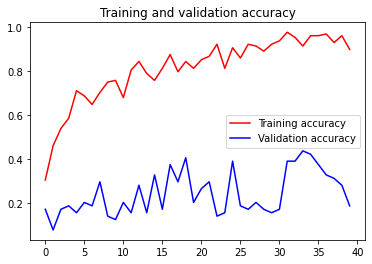

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

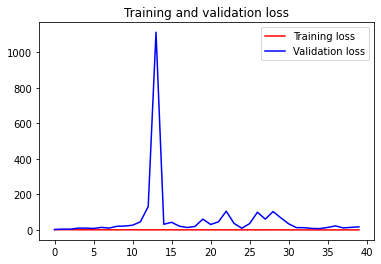

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

**Confusion matrix:**

Accuracy score: 0.27
              precision    recall  f1-score   support

          Ak       0.00      0.00      0.00        28
   Ala_Idris       0.75      0.21      0.33        14
     Buzgulu       0.00      0.00      0.00        10
      Dimnit       0.00      0.00      0.00        24
       Nazli       0.25      1.00      0.40        24

    accuracy                           0.27       100
   macro avg       0.20      0.24      0.15       100
weighted avg       0.17      0.27      0.14       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


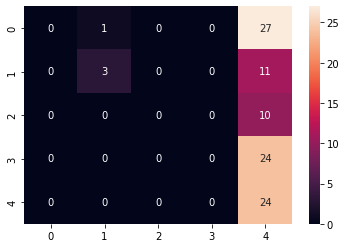

In [ ]:
y_predict = model_inception.predict(test_generator)
confusion(model_inception, np.array(test_ds['classes']), y_predict)

**10 fold cross validation:**\
It took me so much to train the model once, so training it 10 times was impossible so that I changed epoch number to 20.

In [ ]:
kf = KFold(n_splits = 10)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(main_df[['path', 'classes']], main_df[['classes']], test_size=0.2, random_state=42)


Y = y_train

test_generator_inception = test_datagen.flow_from_dataframe(
        test_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)


for train_index, val_index in kf.split(np.zeros(400),Y):
  training_data = X_train.iloc[train_index]
  validation_data = X_train.iloc[val_index]

  train_generator_inception= datagen.flow_from_dataframe(
          training_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  val_generator_inception = datagen.flow_from_dataframe(
          validation_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  history_inception = model_inception.fit(
        train_generator,
        validation_data=val_generator,
        epochs=20,
        verbose=2,
        callbacks = callbacks)
  
  pred = model_inception.evaluate(val_generator_inception)
  pred_test =  model_inception.evaluate(test_generator_inception)
  print("validation result:", pred[1])
  print("test result:", pred_test[1])



Found 100 validated image filenames belonging to 5 classes.
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/20
10/10 - 12s - loss: 0.3523 - accuracy: 0.9094 - val_loss: 0.4343 - val_accuracy: 0.8500 - 12s/epoch - 1s/step
Epoch 2/20
10/10 - 9s - loss: 0.2631 - accuracy: 0.9125 - val_loss: 1.2573 - val_accuracy: 0.7250 - 9s/epoch - 895ms/step
Epoch 3/20
10/10 - 9s - loss: 0.2626 - accuracy: 0.9187 - val_loss: 2.4135 - val_accuracy: 0.5125 - 9s/epoch - 881ms/step
Epoch 4/20
10/10 - 9s - loss: 0.1806 - accuracy: 0.9531 - val_loss: 1.0667 - val_accuracy: 0.7625 - 9s/epoch - 886ms/step
Epoch 5/20
10/10 - 9s - loss: 0.1790 - accuracy: 0.9531 - val_loss: 0.6936 - val_accuracy: 0.8250 - 9s/epoch - 881ms/step
Epoch 6/20
10/10 - 9s - loss: 0.2422 - accuracy: 0.9344 - val_loss: 3.5117 - val_accuracy: 0.6000 - 9s/epoch - 879ms/step
Epoch 7/20
10/10 - 9s - loss: 0.1301 - accuracy: 0.9625 - val_loss: 9.7838 - val_accuracy:

|  Fold Number | val accuracy | test accuracy |
| --- | --- | --- |
| 1 | 80 | 76 |
| 2 | 67 | 36 |
| 3 | 87.5 | 54 |
| 4 | 92.5 | 64.9 |
| 5 | 100 | 89.9 |
| 6 | 72.5 | 43 |
| 7 | 97.5 | 43.9 |
| 8 | 92.5 | 82.9 |
| 9 | 55 | 36 |
| 10 | 57.4 | 60.0 |



#### **EfficientNet B3**:
EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient.

Here I make some changes to the layers of the network and compile the model.

In [ ]:
from tensorflow.keras.optimizers import Adam, Adamax
img_shape=(227, 227, 3)
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(5, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

Fit the model on train set:

In [ ]:
epochs=40

history=model.fit(x=train_generator,  epochs=epochs, verbose=1, validation_data=val_generator,
               validation_steps=None,  shuffle=False,  initial_epoch=0, callbacks = callbacks)

Epoch 1/40
10/10 [==============================] - 27s 1s/step - loss: 9.3866 - accuracy: 0.4125 - val_loss: 23.2111 - val_accuracy: 0.1875
Epoch 2/40
10/10 [==============================] - 10s 1s/step - loss: 8.6452 - accuracy: 0.6062 - val_loss: 16.3870 - val_accuracy: 0.2750
Epoch 3/40
10/10 [==============================] - 12s 1s/step - loss: 7.9530 - accuracy: 0.7750 - val_loss: 18.3507 - val_accuracy: 0.3000
Epoch 4/40
10/10 [==============================] - 10s 1s/step - loss: 7.6577 - accuracy: 0.8531 - val_loss: 17.0573 - val_accuracy: 0.3000
Epoch 5/40
10/10 [==============================] - 10s 1s/step - loss: 7.3561 - accuracy: 0.8938 - val_loss: 14.6324 - val_accuracy: 0.3125
Epoch 6/40
10/10 [==============================] - 10s 1s/step - loss: 7.0510 - accuracy: 0.9219 - val_loss: 13.5889 - val_accuracy: 0.3000
Epoch 7/40
10/10 [==============================] - 10s 1s/step - loss: 6.8732 - accuracy: 0.9094 - val_loss: 11.6901 - val_accuracy: 0.4250
Epoch 8/40
10

In [ ]:
pred = model.evaluate(test_generator)

4/4 [==============================] - 1s 169ms/step - loss: 2.6357 - accuracy: 0.9500


| epoch |learning rate | val accuracy | test accuracy |
| --- | --- | --- | ---|
| 40 | 0.001 | 95.0 | 95.0 |
| 40 | 0.0001 | 80.0 | 84.0 |

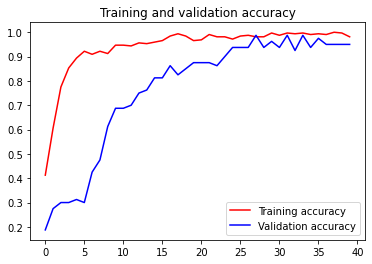

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

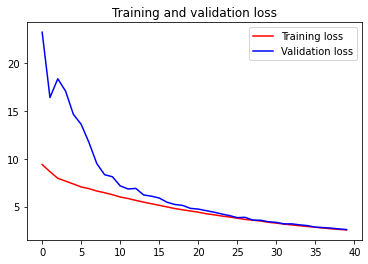

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

**Confusion matrix:**

Accuracy score: 0.95
              precision    recall  f1-score   support

          Ak       0.96      0.89      0.93        28
   Ala_Idris       1.00      0.86      0.92        14
     Buzgulu       0.91      1.00      0.95        10
      Dimnit       0.92      1.00      0.96        24
       Nazli       0.96      1.00      0.98        24

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



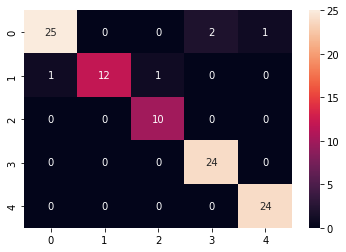

In [ ]:
y_predict = model.predict(test_generator)
confusion(model, np.array(test_ds['classes']), y_predict)

**10 fold cross validation:**\
It took me so much to train the model once, so training it 10 times was impossible so that I changed epoch number to 25.

In [ ]:
kf = KFold(n_splits = 10)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(main_df[['path', 'classes']], main_df[['classes']], test_size=0.2, random_state=42)


Y = y_train

test_generator_B3 = test_datagen.flow_from_dataframe(
        test_ds,  # This is the source directory for training images
        x_col='path',
        y_col='classes',
        target_size=(227, 227), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)


for train_index, val_index in kf.split(np.zeros(400),Y):
  training_data = X_train.iloc[train_index]
  validation_data = X_train.iloc[val_index]

  train_generator_B3= datagen.flow_from_dataframe(
          training_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  val_generator_B3 = datagen.flow_from_dataframe(
          validation_data,  # This is the source directory for training images
          x_col='path',
          y_col='classes',
          target_size=(227, 227), 
          batch_size=32,
          class_mode="categorical",
          shuffle=True,
  )

  history_inception = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=20,
        verbose=2,
        callbacks = callbacks)
  
  pred = model.evaluate(val_generator_B3)
  pred_test =  model.evaluate(test_generator_B3)
  print("validation result:", pred[1])
  print("test result:", pred_test[1])



Found 100 validated image filenames belonging to 5 classes.
Found 360 validated image filenames belonging to 5 classes.
Found 40 validated image filenames belonging to 5 classes.
Epoch 1/20
10/10 - 11s - loss: 2.4775 - accuracy: 0.9906 - val_loss: 2.5315 - val_accuracy: 0.9500 - 11s/epoch - 1s/step
Epoch 2/20
10/10 - 10s - loss: 2.4094 - accuracy: 0.9937 - val_loss: 2.4450 - val_accuracy: 0.9500 - 10s/epoch - 1s/step
Epoch 3/20
10/10 - 10s - loss: 2.3224 - accuracy: 0.9937 - val_loss: 2.3434 - val_accuracy: 0.9625 - 10s/epoch - 1s/step
Epoch 4/20
10/10 - 10s - loss: 2.2549 - accuracy: 0.9937 - val_loss: 2.2577 - val_accuracy: 0.9875 - 10s/epoch - 1s/step
Epoch 5/20
10/10 - 10s - loss: 2.1901 - accuracy: 0.9969 - val_loss: 2.2089 - val_accuracy: 0.9750 - 10s/epoch - 1s/step
Epoch 6/20
10/10 - 10s - loss: 2.1231 - accuracy: 0.9969 - val_loss: 2.1396 - val_accuracy: 0.9750 - 10s/epoch - 1s/step
Epoch 7/20
10/10 - 11s - loss: 2.0643 - accuracy: 1.0000 - val_loss: 2.1060 - val_accuracy: 0.9

|  Fold Number | val accuracy | test accuracy |
| --- | --- | --- |
| 1 | 94.9 | 93 |
| 2 | 99.9 | 94.9 |
| 3 | 100 | 91.0 |
| 4 | 100 | 93.9 |
| 5 | 100 | 92.0 |
| 6 | 97.5 | 93.9 |
| 7 | 97.5 | 93.0 |
| 8 | 100 | 97 |
| 9 | 100 | 92 |
| 10 | 100 | 92  |



#### **Autoencoder:**
Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.\
Autoencoders consists of 4 main parts:


1.   Encoder
2.   Bottleneck
3.   Decoder
4.   Reconstruction Loss

Autoencoders are used to help reduce the noise in data. Through the process of compressing input data, encoding it, and then reconstructing it as an output, autoencoders allow you to reduce dimensionality and focus only on areas of real value.\
I intended to use an autoencoder inorder to reduce the noise in my data.

Editting the size of the input of the autoencoder:

In [ ]:
encoder_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
) 

encoder_train_generator= test_datagen.flow_from_dataframe(
        train_ds,  # This is the source directory for training images
        x_col='path',
        y_col='path',
        target_size=(200, 200), 
        batch_size=32,
        class_mode="input",
        shuffle=True,
)


Found 320 validated image filenames.


Designing the encoder part:

In [ ]:
input_shape = (200, 200, 3)
n_input = 200 * 200 * 3

encoder = Sequential()
encoder.add(layers.Rescaling(1./255, input_shape = input_shape))
encoder.add(layers.Conv2D(16, 3, padding='same', strides = 2, activation='relu'))
encoder.add(layers.MaxPooling2D())
encoder.add(layers.Conv2D(16, 3, padding='valid', strides = 2, activation='relu'))
encoder.add(layers.MaxPooling2D())
encoder.add(layers.Flatten())
encoder.add(layers.Dense(100, activation='relu'))
encoder.add(Dense(30, activation = "relu"))

encoder.compile(optimizer='adam', loss="mse", metrics=['accuracy'])

Designing decoder part:

In [ ]:
decoder = Sequential()
decoder.add(layers.Input(shape=(30)))
decoder.add(Dense(40000, activation="relu"))
decoder.add(Reshape((50, 50, 16)))
decoder.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
decoder.add(UpSampling2D((2, 2)))
decoder.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
decoder.add(UpSampling2D((2, 2)))

decoder.add(Conv2D(3, (3, 3), padding='same'))

decoder.add(layers.Rescaling(255))
decoder.add(Reshape(input_shape))

decoder.compile(optimizer='adam', loss="mse", metrics=['accuracy'])

Adding them together and compiling the autoencoder:

In [ ]:
autoencoder_input = layers.Input(shape =input_shape )

encoded_to_decoder = encoder(autoencoder_input)
decoded_to_autoencoder = decoder(encoded_to_decoder)
autoencoder = Model (autoencoder_input, decoded_to_autoencoder)

autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 30)                236298    
                                                                 
 sequential_3 (Sequential)   (None, 200, 200, 3)       1258947   
                                                                 
Total params: 1,495,245
Trainable params: 1,495,245
Non-trainable params: 0
_________________________________________________________________


Getting the data ready for the autoencoder:

In [ ]:
encoder_inp = []
for i in range(len(encoder_train_generator)):
  encoder_inp.append(encoder_train_generator[i][0][0])

encoder_inp = np.array(encoder_inp)


Fitting the autoencoder:

In [ ]:
autoencoder.fit(x= encoder_inp, y=encoder_inp, epochs = 50, verbose=1, shuffle = True)

Epoch 1/50
1/1 [==============================] - 0s 40ms/step - loss: 8407.9844 - accuracy: 0.0059
Epoch 2/50
1/1 [==============================] - 0s 39ms/step - loss: 6841.5322 - accuracy: 0.0058
Epoch 3/50
1/1 [==============================] - 0s 36ms/step - loss: 5506.1182 - accuracy: 0.0053
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 5268.2207 - accuracy: 0.0067
Epoch 5/50
1/1 [==============================] - 0s 36ms/step - loss: 5305.8652 - accuracy: 0.0202
Epoch 6/50
1/1 [==============================] - 0s 34ms/step - loss: 5132.6011 - accuracy: 0.0577
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 4681.7275 - accuracy: 0.0995
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 4050.3208 - accuracy: 0.1285
Epoch 9/50
1/1 [==============================] - 0s 31ms/step - loss: 3484.1069 - accuracy: 0.1463
Epoch 10/50
1/1 [==============================] - 0s 36ms/step - loss: 3323.3862 - accuracy: 0.1569

In [ ]:
predict = autoencoder.predict(encoder_inp)

In [ ]:
def encoder_ans(pr):
    n = 10
    indices = np.random.randint(len(pr), size=n)
    images1 = pr[indices, :]

    plt.figure(figsize=(10, 7))
    for i, image1 in enumerate(images1):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(200, 200,3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
  

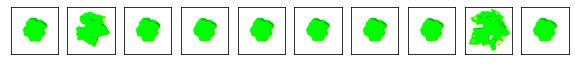

In [ ]:
encoder_ans(predict)

As you can see, the images made from the autoencoder are not as good as the inputs, so the models wouldn't be able to recognize them easier. The autoencoder can not help us maximize the accuracy.

### **Conclusion:**

The best accuracy I got for this project was 95. I got this accuracy using a pre-trained model(EfficientNet B3). I ran the model for 40 epochs and after that I didn't notice any improvements and that's how I understood this is the best accuracy I can get using this model.